In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

from datetime import datetime


pd.set_option("display.max_columns", None)

In [2]:
# load dataset
data = pd.read_json('../../data/TRAINING_dataset.json')
data

,gender,stakeholder_category,us_name,uni_rank,degree_score,edu_marketing,edu_communication,edu_english,edu_political science,edu_business management,edu_psychology,edu_liberal studies,edu_communications,edu_german,edu_electrical engineering,edu_electrical engineering and computer science,edu_computer science,edu_software engineering,edu_management,edu_education,edu_organizational leadership,edu_business administration,edu_business administration and management,edu_business,edu_media studies,edu_entrepreneurship,edu_computer engineering,edu_broadcasting,edu_human resources,edu_biochemistry,edu_accounting,edu_broadcast journalism,edu_mathematics,edu_liberal arts,edu_history,edu_art,edu_data science,edu_applied physics,edu_physics,edu_information systems,edu_design,edu_leadership,edu_international relations,edu_arabic,edu_entrepreneurial studies,edu_computer and information systems,edu_drawing,edu_electronics,edu_nanotechnology,edu_engineering,edu_economics,edu_business marketing,edu_sport management,edu_architecture,edu_accountancy,edu_french language,edu_literature,edu_french language and literature,edu_english language and literature,edu_english language,edu_graphic design,edu_art history,edu_anthropology,edu_politics,edu_russian,edu_international studies,edu_real estate,edu_finance,edu_international affairs,edu_sociology,edu_teaching,edu_business economics,edu_medicine,edu_biology,edu_operations management,edu_mechanical engineering,edu_religious studies,edu_computer systems,edu_ministry,edu_philosophy,edu_civil engineering,edu_rhetoric,edu_logistics,edu_electronics engineering,edu_telecommunications,edu_network administration,edu_criminal justice,edu_law enforcement,edu_statistics,edu_materials science,edu_international business,edu_latin american studies,edu_social science,edu_computer systems engineering,edu_general business,edu_product marketing,edu_spanish,edu_journalism,edu_health science,edu_public health,edu_theological studies,edu_theology,edu_human resources management,edu_social work,edu_supply chain management,edu_chemical engineering,edu_industrial engineering,edu_coaching,edu_fine arts,edu_applied mathematics,edu_comparative literature,edu_aviation,edu_public relations,edu_commerce,edu_theatre,edu_project management,edu_computer science and engineering,edu_piano,edu_piano performance,edu_french,edu_spanish language,edu_general studies,edu_corporate finance,edu_investment banking,edu_chinese language,edu_archeology,edu_classical literature,edu_european history,edu_global studies,edu_public policy,edu_communication studies,edu_applied economics,edu_italian studies,edu_financial management,edu_human relations,edu_information science,edu_music,edu_public administration,edu_government,edu_management science,edu_film,edu_corrections,edu_labor relations,edu_financial economics,edu_neuroscience,edu_premed,edu_geochemistry,edu_geology,edu_legal studies,edu_environmental science,edu_industrial relations,edu_law,edu_financial engineering,edu_finance and marketing,edu_counseling,edu_fashion,edu_aerospace engineering,edu_writing,edu_sustainability,edu_linguistics,edu_general education,edu_physical therapy,edu_elementary education,edu_tourism,edu_business studies,edu_photography,edu_human resource management,edu_biomedical science,edu_kinesiology,edu_forensics,edu_informatics,edu_animation,edu_physiology,edu_multimedia,edu_political science and government,edu_banking,edu_health education,edu_english literature,edu_advertising,edu_creative writing,edu_clinical psychology,edu_latin,edu_chinese,edu_environmental studies,edu_cognitive science,edu_composition,edu_computer programming,edu_actuarial science,edu_fundraising,edu_global health,edu_theater arts,edu_urban studies,edu_social sciences,edu_studio arts,edu_exercise science,edu_european studies,edu_web development,edu_mechatronics engineering,edu_industrial design,edu_television,edu_italian,edu_japanese language studies,edu_applied psychology,edu_human development,edu_compute

In [3]:
X = data.drop('stakeholder_category', axis=1) # Features
y = data['stakeholder_category'] # Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [5]:
def run_experiment(criterion, splitter, min_samples_split, min_samples_leaf, max_depth):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion=criterion,
                                 splitter=splitter,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_depth=max_depth)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Model Accuracy, how often is the classifier correct?
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    return metrics.accuracy_score(y_test, y_pred)

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [12]:
maxi = [0,0]
for depth in range(1,50):
    print(depth)    
    for split in range(2,10):
        for leaf in range(2,10):
            
            score = run_experiment("gini", 'random', split, leaf, depth)
        
            if score > maxi[0]:
                maxi = [score, split, leaf, depth]
maxi

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


[0.7254237288135593, 3, 5, 14]

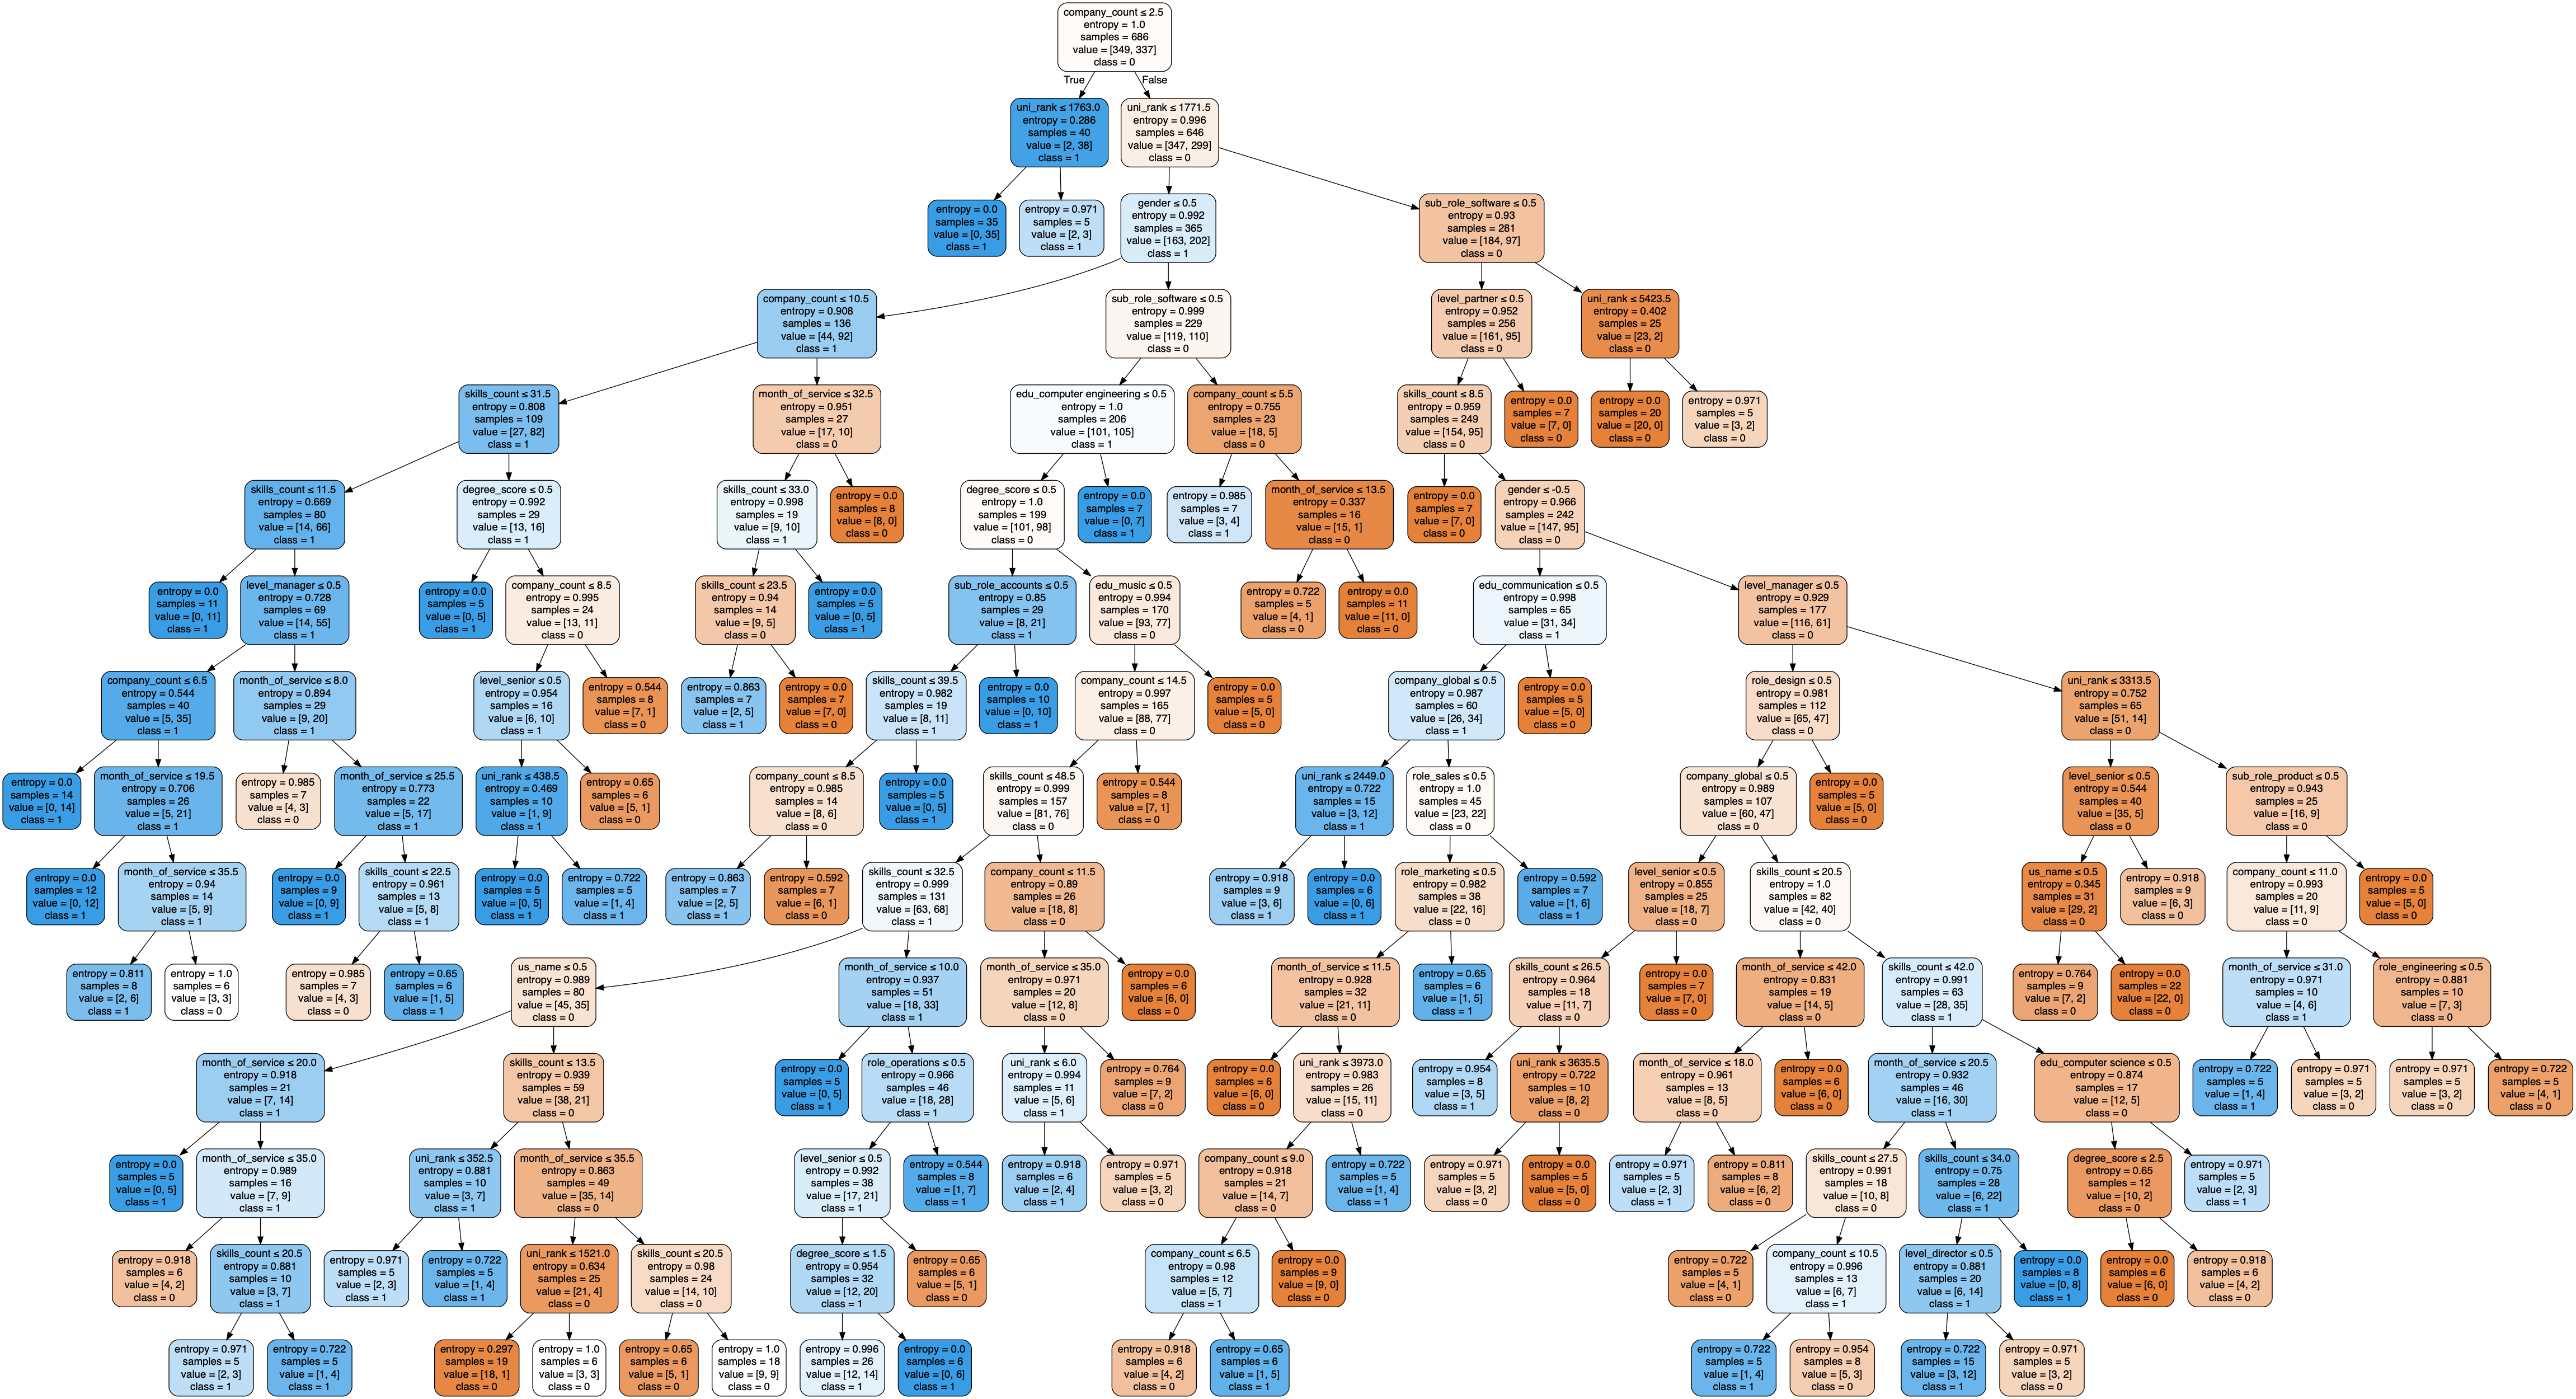

In [36]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", splitter='best', min_samples_split=maxi[1], min_samples_leaf=maxi[2], max_depth=maxi[3])

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)



now = datetime.now().strftime("%Y%m%d-%H%M%S")
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../../exp/decision_forest/decision_forest' + now + '.png')
Image(graph.create_png())

In [62]:
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
np.savetxt('../../data/feat_importance.csv', np.array([np.array(X.columns),feat_importance]).T, delimiter=',', fmt='%s')

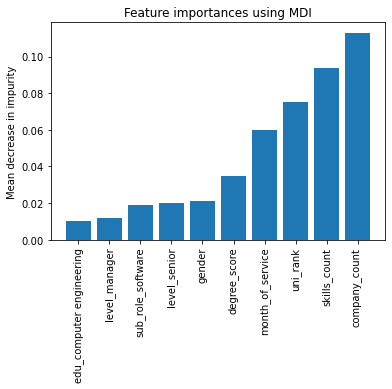

In [45]:
feat_imp = []
feat = []
for idx, imp in enumerate(feat_importance):
    if imp > 0.01:
        feat.append(X.columns[idx])
        feat_imp.append(round(imp,3))

sort_idx = np.argsort(feat_imp)
feat_imp = [feat_imp[x] for x in sort_idx] 
feat = [feat[x] for x in sort_idx] 

now = datetime.now().strftime("%Y%m%d-%H%M%S")
plt.bar(feat, feat_imp)
plt.xticks(rotation=90)
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.savefig('../../exp/decision_forest/feature_importance' + now + '.png', 
            bbox_inches = "tight", 
            facecolor='white')
plt.show()


The depth-24 tree achieves the best mean cross-validation accuracy 63.1037 +/- 5.46346% on training dataset


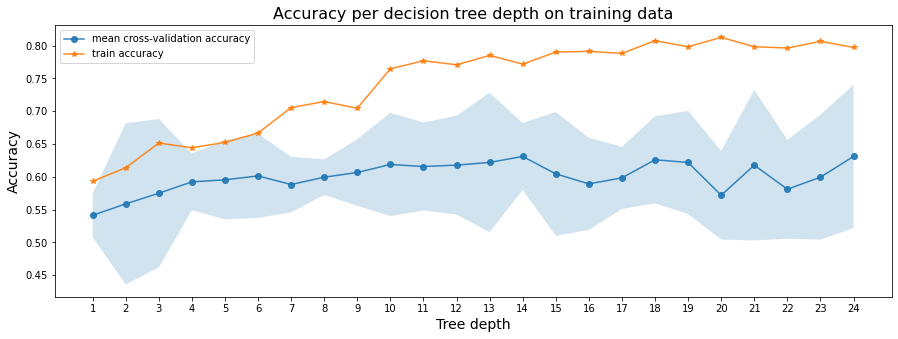

In [35]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion="gini", 
                                            splitter='random', 
                                            min_samples_split=maxi[1], 
                                            min_samples_leaf=maxi[2],
                                            max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X,#X_train,
                                                                                        y,#y_train,
                                                                                        sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

